# Exploratory Data Analysis
> ## Bagaimana Cara Merekomendasikan Lagu bedasarkan kebiasaan User? (Dataset User Spotify)


> ### Define Problem
> Spotify merupakan platform pemutar audio yang sangat diminati oleh masyakarat dunia, tidak terkecuali di Indonesia,setiap user mempunyai preferensi musik yang berbeda beda, dimulai dari yang umum adalah genre lagu yang mereka suka, saya merinci problem saya sebagai berikut :
>- 1. Bagaimana cara sebuah aplikasi bisa merekomendasi sebuah musik yang tepat pada user?
>- 2. Bagaimana cara sebuah aplikasi bisa merekomendasi agar user tertarik untuk mendengarkan musik diluar genre yang mereka sukai?

>Dari pertanyaan saya diatas soal problem tersebut, saya menemukan sebuah dataset yang sesuai untuk tujuan saya nantinya.
Data yang saya temukan bersumber dari Kaggle.com

> Dataset ini berisikan Daftar Nama Musik yang memuat element penting bagi saya yaitu **Genre** dan **Audio Features** (Beats Per Minute,  Energy, Danceability, Loudness, Liveness, Valance, Acousticness, Speechiness)
>Dimana Arti dari Nilai Audio Features ini adalah contoh Acousticness --> **Semakin tinggi** nilainya bahwa sebuah lagu semakin **akustik** tipe lagu ini.

### Tujuan EDA

1. Untuk meningkatkan experience kepada User tentang rekomendasi musik pada sebuah aplikasi berikan.
2. Memberikan experience baru kepada user tentang rekomendasi mengekplore lagu lagu yang mungkin belum pernah didengarkan oleh user.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
spotify=pd.read_csv("spotify-2000.csv")
spotifyrealdata =pd.read_csv("spotify-2000.csv")

In [213]:
spotifyrealdata

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


#### Dari data diatas saya hanya menggunakan kolom Top Genre, BPM,Energy, Danceability, Loudness(dB), Liveness, Valance, Acousticness, Speechiness, dan Popularity
#### Karena menurut saya inilah data yang sangat penting untuk menyelesaikan problem yang sudah saya define diatas

### Pengecekan Data yang NULL
setelah melakukan pengecekan, tidak ada satu kolompun yang tidak terisi atau NULL

In [15]:
spotify.isnull()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Pengecekan Nilai Rata Rata Dari seluruh Musik

Hal ini berguna untuk memberikan rekomendasi kepada user untuk memberikan rekomendasi musik yang lebih tepat diluar genre yang biasa nya user dengarkan.

**std** atau standar deviasi(ukuran sebaran data) dapat digunakan sebagai range setiap nilai pada kolom **BPM** sampai pada **Popularity**

In [20]:
spotify.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


## TOP 10 Genre

dari Dataset User, Ini merupakan **TOP Genre 10** yang User **sering** didengarkan (Dengan menghitung total Genre pada setiap lagu yang User Dengarkan)

In [130]:
topgenre = pd.crosstab(index=spotify['Top Genre'], columns=spotify['Top Genre'].count()).sort_values(spotify['Top Genre'].count(),ascending=False).head(10)
topgenre.rename(columns = {1994:'Total'}, inplace = True)
topgenre

col_0,Total
Top Genre,
album rock,413
adult standards,123
dutch pop,88
alternative rock,86
dance pop,83
dutch indie,75
alternative metal,70
dance rock,52
dutch cabaret,51


#### Melihat Rata Rata **BPM |Energy | Danceability | Loudness | Liveness | Valance | Acousticness | Speechiness** pada setiap User

In [125]:
meanuser = spotify.groupby(['Top Genre']).mean()
del meanuser['Index']
del meanuser['Year']
del meanuser['Popularity']
meanuser

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness
Top Genre,,,,,,,,
acid jazz,92.000000,95.000000,66.000000,-5.000000,14.000000,52.000000,13.000000,11.000000
acoustic pop,123.750000,28.250000,48.750000,-11.250000,16.500000,25.750000,58.250000,3.750000
adult standards,117.105691,42.658537,49.162602,-11.504065,19.243902,53.398374,51.382114,3.926829
afropop,154.000000,70.000000,68.000000,-10.000000,33.000000,51.000000,8.000000,3.000000
alaska indie,131.000000,22.000000,46.000000,-10.000000,11.000000,15.000000,90.000000,3.000000
...,...,...,...,...,...,...,...,...
stomp and holler,102.000000,73.000000,48.000000,-5.000000,21.000000,43.000000,3.000000,3.000000
streektaal,98.000000,21.000000,61.000000,-20.000000,8.000000,42.000000,60.000000,3.000000
trance,138.000000,85.000000,60.000000,-6.000000,6.000000,9.000000,1.000000,6.000000


### Ini lah **TOP 10 Genre** dan **Rata - Rata Audio Features** dari sebuah User

#### Dari dua data diatas **(Top 10 Genres User dan Rata-Rata Audio Features)** dapat kita gabungkan menjadi satu dataset

In [170]:
top10userspec = pd.merge(topgenre, meanuser, on = "Top Genre", how = "inner")
top10userspec
newidx =['album rock','adult standards','dutch pop','alternative rock','dance pop','dutch indie','alternative metal','dance rock','dutch cabaret','classic rock']
top10userspec['Top Genre User'] = newidx
top10userspec.set_index('Top Genre User',inplace=True)
top10userspec

,Total,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness
Top Genre User,,,,,,,,,
album rock,413,121.929782,59.549637,51.411622,-10.014528,17.924939,52.721550,26.847458,4.818402
adult standards,123,117.105691,42.658537,49.162602,-11.504065,19.243902,53.398374,51.382114,3.926829
dutch pop,88,126.988636,57.045455,51.147727,-9.000000,20.318182,43.909091,30.375000,3.920455
alternative rock,86,118.837209,69.209302,48.534884,-7.662791,19.906977,46.674419,14.732558,4.744186
dance pop,83,119.072289,64.457831,60.650602,-6.975904,16.228916,50.710843,23.325301,6.024096
dutch indie,75,117.106667,56.773333,53.400000,-8.973333,18.200000,50.120000,32.293333,3.893333
alternative metal,70,124.442857,73.885714,45.742857,-6.500000,18.742857,40.314286,10.614286,5.228571
dance rock,52,124.903846,65.576923,57.903846,-9.519231,21.826923,59.211538,19.826923,4.480769
dutch cabaret,51,119.588235,49.862745,54.137255,-10.764706,20.372549,46.019608,46.549020,5.627451


## Visualisasi Top 10 User Genre
Bedasarkan Visualisasi barplot dibawah,
User terlihat jelas sangat menyukai genre **album Rock** dibandingkan 9 top genres lainnya, ditandai dengan gap/jarak yang sangat jauh, dengan **total 413 kali** mendengarkan music di genre ini.

<BarContainer object of 10 artists>

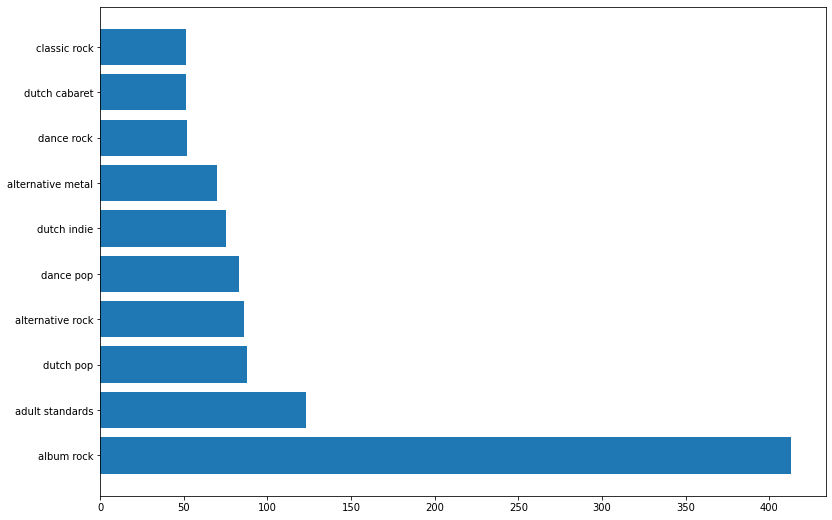

In [169]:
plt.figure(figsize=(13,9))
plt.barh( top10userspec.index.values,top10userspec['Total'])

In [224]:
overalfeatures= spotify
overall = list(overalfeatures.mean())

In [225]:
stduser = list(overalfeatures.std())

## Explore New Genres Based on Audio Features of Users

Dengan Data Rata Rata Audio Features yang didengarkan dan **Std**(Ukuran Variasi) Audio Features sebagai range nya yang kita dapatkan.

Kita dapat merekomendasikan **Pengalaman** baru dengan memberikan playlist pada user dengan mengunakan data ini

In [203]:
newexp = pd.DataFrame({
    'User Audio Features Average' : overall,
    'Range' : stduser,
    'Audio Features' : ['Beats Per Minute (BPM)','Energy','Danceability','Loudness (dB)','Liveness','Valence','Acousticness','Speechiness','Popularity']
})

In [220]:
newexp

,User Audio Features Average,Range
Audio Features,,
Beats Per Minute (BPM),120.215647,28.028096
Energy,59.679539,22.154322
Danceability,53.238215,15.351507
Loudness (dB),-9.008526,3.647876
Liveness,19.012036,16.727378
Valence,49.408726,24.858212
Acousticness,28.858074,29.011986
Speechiness,4.994985,4.401566
Popularity,59.526580,14.351600


## Kesimpulan

1. Dari Insight yang didapatkan pada User pengguna aplikasi **Spotify** ini bahwa dengan **Top Genre dan Rata Rata Audio Features** yang dimiliki oleh sebuah user, kita sudah dapat merekomendasikan **Top 10 genre** beserta **Rata Rata Audio Features** nya dengan membuat fitur rekomendasi lagu untuk ditambahkan ke playlist si User tersebut

2. Dari data rata-rata keseluruhan **Audio Features** dengan **range** plus minus dari rata ratanya yang didengarkan oleh User, kita dapat menawarkan pengalaman baru untuk User pada lagu-lagu yang diluar dari **Top 10 Genres** yang paling sering didengarkan oleh si User ini dengan membuat dan kemudian menawarkan sebuah **playlist** baru untuk si User bedasarkan **Popularity** nya juga, tepatnya menawarkan lagu diatas rata rata **Popularity** User tersebut.

## Saran

Dari **kesimpulan** diatas, saya memberikan saran :
1. Jika dataset lebih dilengkapi waktu yang spesifik agar kita tahu kebiasaan user setiap minggunya, untuk memberikan rekomendasi-rekomendasi lagu di minggu berikutnya.
2. Jika dataset lebih dilengkapi total waktu User mendengarkan lagu tertentu, kita dapat memberikan rekomendasi yang lebih tepat sasaran.
3. Jika dataset juga lebih dilengkapi lagu apa saja yang paling sering di skip oleh user juga bisa memberikan rekomendasi yang lebih tepat sasaran.

Demikian EDA yang dapat saya lakukan dan Insight yang saya dapatkan pada dataset ini.

Saya sangat meminta saran terkait EDA yang saya lakukan.

Saya ucapkan Terima Kasih